In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization

#import cv2
import os
from PIL import Image

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [57]:
#folder = r"C:\Users\magnu\Desktop\D7041E_FER\datasets\archive\images\images\train\angry"

def imagesFromFolder(folder):
    images = sorted(os.listdir(folder))

    image_array = []
    for image in images:
        im = Image.open(os.path.join(folder,image))
        image_array.append(np.asarray(im)) #.transpose(1, 0, 2))

    images = np.array(image_array)
    print(images.shape)

In [33]:
print(images.shape)
print(images.shape[1])
print(48*48)

(3993, 48, 48)
48
2304


In [53]:
images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
print(images.shape)

(3993, 2304)


In [54]:
def plotSample(images):
    plt.figure(figsize=(10, 3))
    plt.imshow(images.reshape(48,48, 1))
    plt.show()
    plt.close()

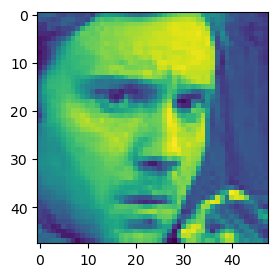

In [55]:
plotSample(images[0])

X.min() 0.0
X.max() 1.0
(2304, 2304) (2304,)
min: 0.0
max: 1.0


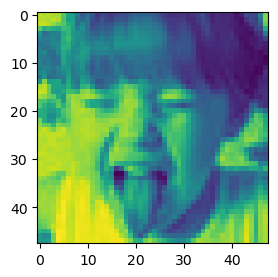

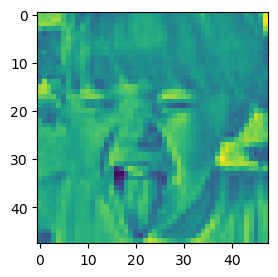

In [56]:
#Whitening used in lab 1 used here. Kinda works
def whiteningKinda():
    
    images_norm = images/255
    print ('X.min()', images_norm.min())
    print ('X.max()', images_norm.max())
    images_norm.mean(axis=0).shape
    images_norm.mean(axis=0)
    images_norm = images_norm - images_norm.mean(axis=0)
    images_norm = images_norm
    cov = np.cov(images_norm, rowvar=False)
    cov.shape
    U,S,V = np.linalg.svd(cov)
    print (U.shape, S.shape)
    epsilon = 0.1
    images_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(images_norm.T).T
    images_ZCA_rescaled = (images_ZCA - images_ZCA.min()) / (images_ZCA.max() - images_ZCA.min())
    print ('min:', images_ZCA_rescaled.min())
    print ('max:', images_ZCA_rescaled.max())
    plotSample(images[12, :])
    plotSample(images_ZCA_rescaled[12, :])

In [59]:
trainFolders = [r"C:\Users\magnu\Desktop\D7041E_FER\datasets\archive\images\images\train\angry"]
imageArray = imagesFromFolder(r"C:\Users\magnu\Desktop\D7041E_FER\datasets\archive\images\images\train\angry")


(3993, 48, 48)


In [73]:
def preprocessData(inputData, emotion):
    processedInput = np.zeros(shape=((inputData.shape[0], 48, 48)))
                                    
    for i in inputData:                            
        newImage = np.frombuffer(inputData)
        print(newImage.shape)
        newImage = np.reshape(newImage, (48, 48))
        processedInput[i] = image      
    processedInput = processedInput.reshape((processedInput.shape[0], 48, 48, 1))
    processedInput = processedInput.astype('float32')/255
    processedInput = np.array(list(map(int, emotion)))
    processedInput = to_categorical(imageLabels, 7)
    return  processedInput, imageLabels

In [74]:
preprocessData(images, 0)

(1149984,)


ValueError: cannot reshape array of size 1149984 into shape (48,48)